In [1]:
%matplotlib inline 
import numpy as np
from matplotlib import pyplot as plt

### Utility functions

In [2]:

def obj(w):
    ## calculates the obj functions
    r = X*w-y;
    return np.sum(np.multiply(r,r))/2 +  lamda * np.sum(np.abs(w))


## Data

In [3]:
np.random.seed(50)

N = 100
dim = 30
lamda = 1/np.sqrt(N);

w = np.zeros(dim)
n_nonzero = 15
w[np.random.choice(range(dim), n_nonzero, False)] = np.random.randn(n_nonzero)
w = np.matrix(w.reshape(-1, 1))

X = np.matrix(np.random.multivariate_normal([0.0]*dim, np.eye(dim), size = N))
y = X*w

Our objective function of interest is:
$$\frac{1}{2} \| Xw - y \|^2 + \lambda |w|_1 $$

In the cell above, the variables X, y, w and lamda corresponds to $X, y, w$ and $\lambda$ in the equation above.

In [4]:
opt = obj(w)
print('Optimal Objective Function Value: ', opt)

Optimal Objective Function Value:  1.3043384900597284


## Optimal Value using SKLearn

In [5]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=lamda / N, fit_intercept = False)
clf.fit(X, y)

Lasso(alpha=0.001, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [6]:
print('SKLearn obj val: ', obj(clf.coef_.reshape(-1, 1)) )

SKLearn obj val:  1.303641803846212


## Proximal Gradient

In [31]:
max_iter = 100 # max number of iterations of proximal gradient method

In [13]:
alpha_array = np.logspace(-5, -2, num = 10, base = 10.0) #range over which you search hyperparam

In [14]:
alpha_array

array([1.00000000e-05, 2.15443469e-05, 4.64158883e-05, 1.00000000e-04,
       2.15443469e-04, 4.64158883e-04, 1.00000000e-03, 2.15443469e-03,
       4.64158883e-03, 1.00000000e-02])

In [32]:
## Proximal Gadient 

obj_pg = {} #stores obj function value as a function of iteration for each alpha
w_pg = {} #stores the final weight vector learned for each alpha
tol=1e-5

for alpha in alpha_array:
    print('Alpha: ', alpha)

    w_pg[alpha] = np.matrix([0.0]*dim).T
    obj_pg[alpha] = []
    
    
    for t in range(1, max_iter):
        obj_val = obj(w_pg[alpha])
        obj_pg[alpha].append(obj_val.item())
        
        w_pg[alpha] = w_pg[alpha]-alpha*X.T@(X*w_pg[alpha]-y)
        w_pg[alpha] = np.multiply(np.sign(w_pg[alpha]),np.maximum(np.abs(w_pg[alpha])-lamda*alpha,0))
       
        
        new_val=obj(w_pg[alpha])

        if (t%5==0):
            print('iter= {},\tobjective= {:3f}'.format(t, obj_val.item()))
            
        subgradient_norm=np.abs(new_val-obj_val)
        
        if subgradient_norm < tol:
            print("At iteration"+str(t)+"="+str(subgradient_norm)+" < "+ str(epsilon)+" it reaches the convergence. ")
            
            break

Alpha:  1e-05
iter= 5,	objective= 821.989607
iter= 10,	objective= 810.185825
iter= 15,	objective= 798.576933
iter= 20,	objective= 787.159483
iter= 25,	objective= 775.930089
iter= 30,	objective= 764.885430
iter= 35,	objective= 754.022241
iter= 40,	objective= 743.337322
iter= 45,	objective= 732.827528
iter= 50,	objective= 722.489774
iter= 55,	objective= 712.321030
iter= 60,	objective= 702.318321
iter= 65,	objective= 692.478729
iter= 70,	objective= 682.799387
iter= 75,	objective= 673.277481
iter= 80,	objective= 663.910249
iter= 85,	objective= 654.694979
iter= 90,	objective= 645.629009
iter= 95,	objective= 636.709725
Alpha:  2.1544346900318823e-05
iter= 5,	objective= 811.061873
iter= 10,	objective= 786.234953
iter= 15,	objective= 762.281524
iter= 20,	objective= 739.168647
iter= 25,	objective= 716.864675
iter= 30,	objective= 695.339195
iter= 35,	objective= 674.562984
iter= 40,	objective= 654.507959
iter= 45,	objective= 635.147131
iter= 50,	objective= 616.454563
iter= 55,	objective= 598.4053

Text(0, 0.5, 'Objective error')

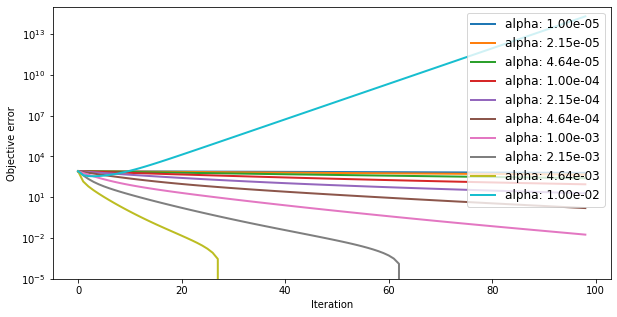

In [36]:
## Plot objective error vs. iteration (log scale)

fig, ax = plt.subplots(figsize = (10, 5))

for alpha in alpha_array:
    plt.semilogy(np.array(obj_pg[alpha])-opt,  linewidth = 2, label = 'alpha: '+'{:.2e}'.format(alpha) )
plt.legend(prop={'size':12})
bottom, top = plt.ylim()  # return the current ylim
plt.ylim(top=1e+15)
plt.ylim(bottom=1e-5)
plt.xlabel('Iteration')
plt.ylabel('Objective error')

## Visualize Coefficients

pick the coefficient corresponding to alpha value with the minimum objective function value

In [37]:
min_obj= np.inf
min_alpha = None

In [38]:
for alpha in alpha_array:
    if obj_pg[alpha][-1] < min_obj:
        min_alpha = alpha
        min_obj = obj_pg[alpha][-1]

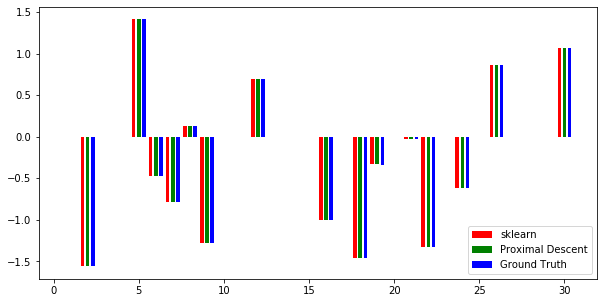

In [39]:
plt.figure(figsize = (10, 5))

ax = plt.subplot(111)

x = np.arange(1, dim+1)

ax.bar(x-0.3, clf.coef_, width=0.2, color='r', align='center', label = 'sklearn')
ax.bar(x, np.ravel(np.array(w_pg[min_alpha])), width=0.2, color='g', align='center', label = 'Proximal Descent')
ax.bar(x+0.3, np.ravel(np.array(w)), width=0.2, color='b', align='center', label = 'Ground Truth')

plt.legend()

plt.show()